# HA1 COVID 19 Data

In [1]:
import pandas as pd # for reading csv file
import matplotlib.pyplot as plot # for plotting graphs
import numpy as np # for mean and median calculations
import statistics as stat # for variance calculation

**Reading the CSV file**

In [2]:
covid_data = pd.read_csv('MD_COVID-19.csv')

**Preparing list of regions**

In [3]:
regions_list = list(dict(covid_data).keys())[2:] # 1st 2 columns are not regions
regions_list

['Allegany',
 'Anne_Arundel',
 'Baltimore',
 'Baltimore_City',
 'Calvert',
 'Caroline',
 'Washington']

**Preparing list of total cases region-wise**

In [4]:
region_total_list = []
for region in regions_list:
    region_total_list.append(covid_data[region].sum())
region_total_list

[366903.0, 2890716, 4845533, 4179710, 271086.0, 169976.0, 670274.0]

**Preparing a 2-dimensional list of number of cases per day region-wise**

In [5]:
regions_cases_list = []
for region in regions_list:
    regions_cases_list.append(list(covid_data[region].fillna(0))) # some values are nan (empty)

## 1A Bar Graph

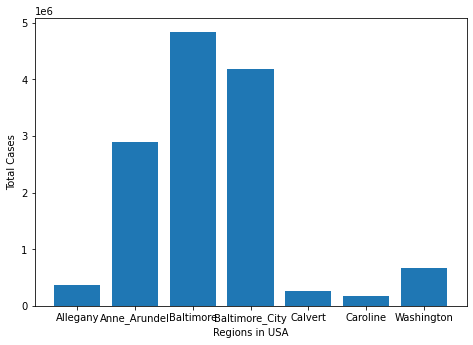

In [6]:
fig1 = plot.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(regions_list, region_total_list)
plot.ylabel("Total Cases")
plot.xlabel("Regions in USA")
plot.show()

## 1B Pie Chart

**Calculating the total number of cases across all regions**

In [7]:
total_cases = 0
for region_total in region_total_list:
    total_cases += region_total
total_cases

13394198.0

**Preparing list pf percentage of cases region-wise**

In [8]:
regions_percentage_list = []
for region_total in region_total_list:
    regions_percentage_list.append(region_total*100.0/total_cases)
regions_percentage_list

[2.739268151777359,
 21.581852082521102,
 36.176357852855396,
 31.205377134188996,
 2.0239061719111513,
 1.2690270817259832,
 5.004211525020012]

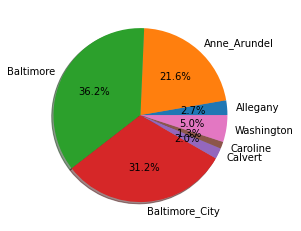

In [9]:
fig2, ax2 = plot.subplots()
ax2.pie(regions_percentage_list, labels=regions_list, autopct='%1.1f%%', shadow=True)
plot.show()

## 2 Box Plot

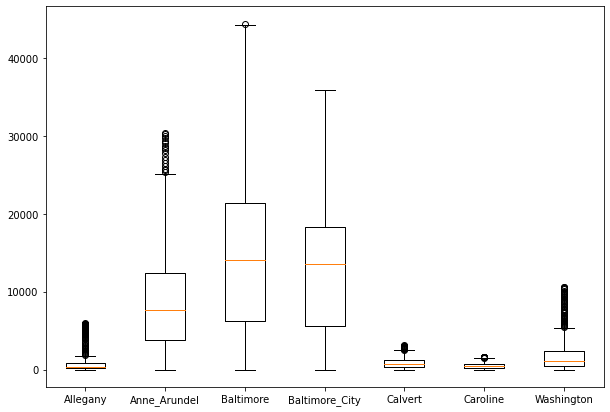

In [10]:
fig3 = plot.figure(1, figsize=(10,7))
ax3 =fig3.add_subplot(111)
bp =ax3.boxplot(regions_cases_list)
plot.xticks([i+1 for i in range(len(regions_list))], regions_list)
plot.show()

## 3A Mean

In [11]:
mean_dict = {}
for i in range(len(regions_list)):
    mean_dict[regions_list[i]] = np.mean(regions_cases_list[i])
mean_dict

{'Allegany': 1179.7524115755627,
 'Anne_Arundel': 9294.906752411576,
 'Baltimore': 15580.491961414791,
 'Baltimore_City': 13439.581993569132,
 'Calvert': 871.6591639871383,
 'Caroline': 546.5466237942122,
 'Washington': 2155.2218649517686}

## 3B Median

In [12]:
median_dict = {}
for i in range(len(regions_list)):
    median_dict[regions_list[i]] = np.median(regions_cases_list[i])
median_dict

{'Allegany': 343.0,
 'Anne_Arundel': 7700.0,
 'Baltimore': 14043.0,
 'Baltimore_City': 13507.0,
 'Calvert': 742.0,
 'Caroline': 465.0,
 'Washington': 1138.0}

## 3C Variance

In [13]:
variance_dict = {}
for i in range(len(regions_list)):
    variance_dict[regions_list[i]] = stat.variance(regions_cases_list[i])
variance_dict

{'Allegany': 3269634.0965667465,
 'Anne_Arundel': 56876920.25901878,
 'Baltimore': 145022354.6313868,
 'Baltimore_City': 96669833.39890052,
 'Calvert': 529846.2189399439,
 'Caroline': 174197.22281920962,
 'Washington': 6903986.553842962}